In [1]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split

X,y = load_iris(return_X_y = True)

In [2]:
bunch = load_iris()
X, y = bunch.data, bunch.target
num_of_classes = len(bunch.target_names)
strategies = ['one_v_all']
print("Pick one: ", strategies, sep = "\n")
strategy = strategies[int(input())]
print(num_of_classes, strategy, X, y, sep = "\n")

Pick one: 
['one_v_all']
0
3
one_v_all
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4

In [3]:
X_train, _, y_train, _ = train_test_split(X, y, test_size = 0, shuffle = True)
print(np.shape(X_train), np.shape(y_train), sep = "\n")

(150, 4)
(150,)


In [4]:
def calculate_mean(num_classes, clas, X_train, y_train, strategy):
  d = len(X_train[0])
  mu0, mu1 = np.zeros((1,d)), np.zeros((1,d))
  N0 = len(X_train)/num_classes 
  N1 = len(X_train) - N0

  for idx, target in enumerate(y_train):
    if target == clas:
      mu0 += X_train[idx]
    else:
      mu1 += X_train[idx]

  mu0, mu1 = mu0/N0, mu1/N1
#   print("mu0 and mu1: ", len(mu0), len(mu1), mu0, mu1,np.shape(mu0), np.shape(mu1), sep = "\n")
  return (mu0, mu1)

In [5]:
def calculate_s_within(clas, X_train, y_train, mu0, mu1):
  d = len(X_train[0])
  Swithin = np.zeros((d,d))
  for idx, target in enumerate(y_train):
    if target == clas:
      distanceFromMean = (X_train[idx] - mu0)
      Swithin += np.matmul(np.transpose(distanceFromMean), distanceFromMean) 
    else:
      distanceFromMean = (X_train[idx] - mu1)
      Swithin += np.matmul(np.transpose(distanceFromMean), distanceFromMean)

#   print(np.shape(Swithin), Swithin, sep = "\n")
  return Swithin

In [6]:
import matplotlib.pyplot as plt

In [7]:
def project_in_one_d(w, clas, X_train, y_train):
  z0, z1 = [], []
  for idx, target in enumerate(y_train):
    if target == clas:
      z0 += [np.dot(np.transpose(w), X_train[idx])[0]]
    else:
      z1 += [np.dot(np.transpose(w), X_train[idx])[0]]
      
#   print("z0 and z1: ", np.shape(z0), np.shape(z1), z0, z1, sep = "\n")

  return (z0, z1)  

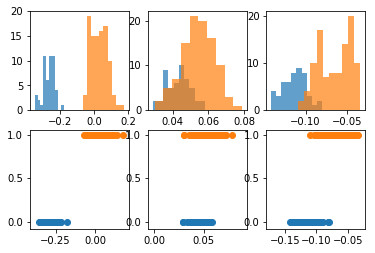

In [8]:
def execute(clas):
    (mu0, mu1) = calculate_mean(num_of_classes, clas, X_train, y_train, strategy)
    Swithin = calculate_s_within(clas, X_train, y_train, mu0, mu1)
    w = np.matmul(np.linalg.inv(Swithin), (np.transpose(mu1) - np.transpose(mu0)))
#     print ("weight data")
#     print(np.shape(w), w, sep = "\n")
    (z0, z1) = project_in_one_d(w, clas, X_train, y_train)

    return(z0, z1)

  
fig, axes = plt.subplots(2, 3)
for class_number in range(num_of_classes):
    (z0, z1) = execute(class_number)
    axes[0,class_number].hist(z0, alpha = 0.7)
    axes[0,class_number].hist(z1, alpha = 0.7)
    axes[1,class_number].scatter(z0,np.zeros(len(z0)))
    axes[1,class_number].scatter(z1,np.full((len(z1)), 1))